In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
breast_data = load_breast_cancer()

In [3]:
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = breast_data['data']
y = breast_data['target']

In [5]:
X.shape, y.shape

((569, 30), (569,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# test_split의 test size 기본 값 : 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
X_train.shape, y_train.shape

((426, 30), (426,))

## 신경망 모델 만들기
1. 신경망 구조 설계
2. 신경망 모델 학습(loss, optimizer)/평가(metrics)방법 설정
3. 학습 및 학습과정 시각화
4. 모델 평가

1,2번 단계 : 모델의 생김새
3,4번 단계 : 학습 및 평가

1,2번 단계 - > in 머신러닝 : 사이킷런에서 임포트 하는 걸로 끝

In [9]:
from tensorflow.keras import Sequential
# inputLayer : 입력층
from tensorflow.keras.layers import InputLayer, Dense

In [16]:
# 1. 모델 구조 설계
model = Sequential() # 모델의 뼈대
model.add(InputLayer(input_shape=(30,))) # 입력층
model.add(Dense(units=25, activation='sigmoid')) # 중간층
model.add(Dense(units=15, activation='sigmoid')) # 중간층
model.add(Dense(units=1, activation='sigmoid')) # 출력층 (회귀, 이진분류, 다진분류 마다 설정값이 다름)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# 2. 신경망 모델 학습
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

In [19]:
# 3. 학습 및 학습과정 시각화
# fit을 할 때 마다 validation_split = 0.2 : 전체 데이터의 20퍼는 검증용, 나머지는 훈련용
breast_history = model.fit(X_train, y_train,
                           validation_split=0.2, epochs=200)

Epoch 1/200
11/11 [==============================] - 2s 21ms/step - loss: 1.1320 - accuracy: 0.3676 - val_loss: 1.0224 - val_accuracy: 0.3953
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 1.0163 - accuracy: 0.3676 - val_loss: 0.9370 - val_accuracy: 0.3953
Epoch 3/200
11/11 [==============================] - 0s 10ms/step - loss: 0.9308 - accuracy: 0.3676 - val_loss: 0.8711 - val_accuracy: 0.3953
Epoch 4/200
11/11 [==============================] - 0s 12ms/step - loss: 0.8656 - accuracy: 0.3676 - val_loss: 0.8116 - val_accuracy: 0.3953
Epoch 5/200
11/11 [==============================] - 0s 39ms/step - loss: 0.8090 - accuracy: 0.3676 - val_loss: 0.7683 - val_accuracy: 0.3953
Epoch 6/200
11/11 [==============================] - 0s 7ms/step - loss: 0.7640 - accuracy: 0.3676 - val_loss: 0.7316 - val_accuracy: 0.3953
Epoch 7/200
11/11 [==============================] - 0s 8ms/step - loss: 0.7291 - accuracy: 0.3676 - val_loss: 0.7005 - val_accuracy: 0.3953
Epoch 8/2

In [20]:
import matplotlib.pyplot as plt

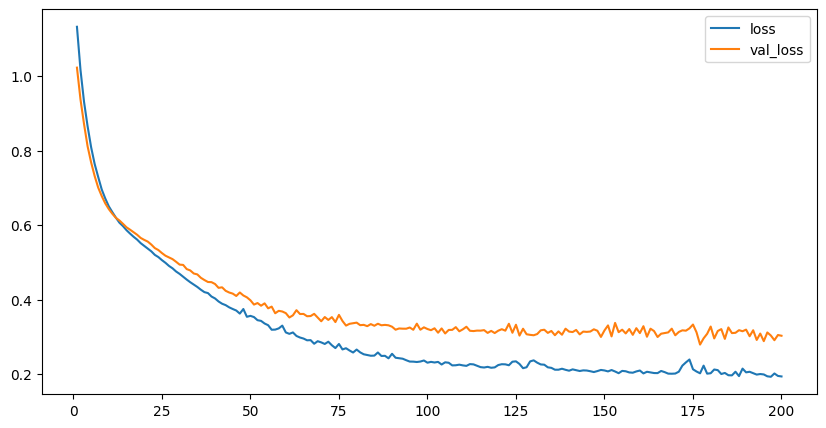

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), breast_history.history['loss'], label='loss')
plt.plot(range(1, 201), breast_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), breast_history.history['acc'], label='acc') # 훈련 데이터 정확도 그래프
plt.plot(range(1, 201), breast_history.history['val_acc'], label='val_acc') # 검 데이터 정확도 그래프
plt.legend()
plt.show()

KeyError: ignored

<Figure size 1000x500 with 0 Axes>